In [1]:
import pandas as pd
import numpy  as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [8]:
!curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:107.0) Gecko/20100101 Firefox/107.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' --header 'Sec-Fetch-Dest: document' --header 'Sec-Fetch-Mode: navigate' --header 'Sec-Fetch-Site: none' --header 'Sec-Fetch-User: ?1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4986/860641/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1670600654&Signature=opgsOe4WZRlCGm8oxTMXH79wsk9GwGHyZd9%2BhOqMncOVstmV57jWp2lLRZAcigP8L8qvSi1RMzVMYwGEijimRycF1Eb50A4KoZKleWIqVPqzKyXRC28yVAKbm0FktSQMfTOXBchWcFG4smuqjc0Bw6tR5OGLATr8zct7bfqCvIg%2BpUvaN3ejxrYLI%2BVMOxaTikairR8zs9N5LOkyoYQG6ltOdtjnUZpL0CRuilaK4o8uz0ky6GnSZl9iFRCC7nWYM%2BS4fB2afu%2FmeHkg7YhoL2dwlPcguefAj46ixZV4gvmsXKmU8eu%2Bg2PDTU2%2BLXM%2BPR0znzVV6dbcIwfS%2FMIbPg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip' --output 'train.csv.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4149k  100 4149k    0     0  2605k      0  0:00:01  0:00:01 --:--:-- 2603k


In [9]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [10]:
# Read in the csv data using pandas 
train  = pd.read_csv('train.csv',index_col=0)

In [11]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
train.loc[:,'ind_var2_0'].nunique()

1

The first thing we shall do is take a look at what types of data we have to train with. Categorical features can be handled via [embedding](https://www.fast.ai/2018/04/29/categorical-embeddings/).

In [12]:
train.dtypes.value_counts()

int64      259
float64    111
dtype: int64

we have no strings, so we shall not be using the aforementioned embedding. However, we do have a large number of integer columns. Let us take a look at how many different values each of these integer columns have (this is a long list, so it has been hidden. Click on "Show hidden" to take a look)

In [13]:
train.select_dtypes(include=['int64']).nunique()

var3                             208
var15                            100
ind_var1_0                         2
ind_var1                           2
ind_var2_0                         1
                                ... 
num_var45_ult3                   172
saldo_var2_ult1                    1
saldo_medio_var13_medio_hace3      1
saldo_medio_var13_medio_ult1       3
TARGET                             2
Length: 259, dtype: int64

we can see that a good many of the integer features have one single value. Such columns have zero variance and thus have no predictive value, so we shall drop these columns from the train, as well as the test data to maintain consistency

In [14]:
train.nunique().values==1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [15]:
features_to_drop = train.nunique()
features_to_drop = features_to_drop.loc[features_to_drop.values==1].index
# now drop these columns from both the training and the test datasets
train = train.drop(features_to_drop,axis=1)

Now let us check for any missing values, as these do not sit well with neural networks

In [16]:
train.isnull().values.any()

False

wonderful, there are no missing values at all. Now let us divide the training data into the features and the target

In [17]:
X = train.iloc[:,:-1]
y = train['TARGET']

Check to see whether the data is [highly imbalanced or not](https://www.kaggle.com/carlmcbrideellis/classification-how-imbalanced-is-imbalanced)

In [18]:
y.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

indeed there is a large class imbalance, in view of this we shall resample the minority class using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) (Synthetic Minority Over-sampling Technique) from the [imbalanced-learn](https://imbalanced-learn.org/stable/) library

In [19]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

let us take a look

In [20]:
y_resampled.value_counts()

0    73012
1    73012
Name: TARGET, dtype: int64

much better. 

As this is a large dataset we shall only use 80% of the data for training, and 20% for validation

In [21]:
X_resampled.shape

(146024, 335)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled,
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  shuffle=True)

also, neural networks like to have data all in the same range, for example [0,1] to improve stability. We shall do this using the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
Note: One should really remove any outliers before doing this as a single outlier can have a large influence on the results

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)

In [24]:
X_train.shape[-1]

335

We are now ready to create our neural network, note that we insert a [dropout layer](https://keras.io/api/layers/regularization_layers/dropout/) as a form of regularization which will  help reduce overfitting by randomly setting (here 30%) of the input unit values to zero.

In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],) ))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=9, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 3024      
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-trainable params: 0
_________________________________________________________________


In [42]:
# save the initial weights for later
initial_weights = model.get_weights()

let us take a look at our model

)or create a more aesthetically pleasing representation via

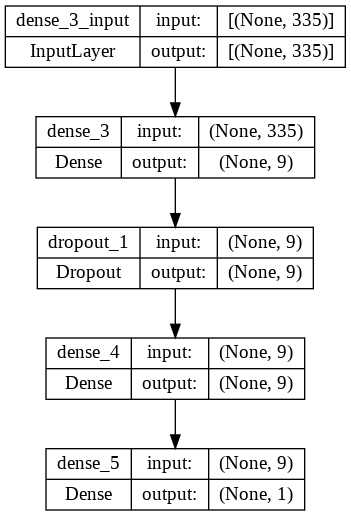

In [43]:
keras.utils.plot_model(model, show_shapes=True)

We shall use the [Adam](https://keras.io/api/optimizers/adam/) (Adaptive Moment Estimation) optimizer, a form of [Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD). For more on the subject see the review ["*An overview of gradient descent optimization algorithms*"](https://arxiv.org/pdf/1609.04747.pdf), written by Sebastian Ruder.
As our problem is binary classification our [loss function](https://en.wikipedia.org/wiki/Loss_function) will be the [binary cross entropy](https://keras.io/api/losses/probabilistic_losses/). Finally, as per the [competition evaluation criteria](https://www.kaggle.com/c/santander-customer-satisfaction/overview/evaluation), we shall calculate the area under the curve (AUC) of the [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and other metrics.

In [44]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [45]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=METRICS
             )

we shall now train the model, providing 1000 rows of training data at a  time (`batch_size`), the whole process repeated 500 times (these are the `epochs`).
If the `batch_size` is  large, it will take more `epochs` for the neural net to converge. For an interesting article on the subject see ["*Effect of Batch Size on Neural Net Training*"](https://medium.com/deep-learning-experiments/effect-of-batch-size-on-neural-net-training-c5ae8516e57).

In [46]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_val, y_val),
          verbose=1)

Epoch 1/500
117/117 [==============================] - 3s 15ms/step - loss: 0.6447 - tp: 46702.0000 - fp: 28579.0000 - tn: 29804.0000 - fn: 11734.0000 - accuracy: 0.6549 - precision: 0.6204 - recall: 0.7992 - auc: 0.7150 - prc: 0.6811 - val_loss: 0.5467 - val_tp: 11466.0000 - val_fp: 3753.0000 - val_tn: 10876.0000 - val_fn: 3110.0000 - val_accuracy: 0.7650 - val_precision: 0.7534 - val_recall: 0.7866 - val_auc: 0.8058 - val_prc: 0.7734
Epoch 2/500
117/117 [==============================] - 1s 8ms/step - loss: 0.5362 - tp: 47288.0000 - fp: 16461.0000 - tn: 41922.0000 - fn: 11148.0000 - accuracy: 0.7637 - precision: 0.7418 - recall: 0.8092 - auc: 0.7994 - prc: 0.7592 - val_loss: 0.4984 - val_tp: 11874.0000 - val_fp: 3847.0000 - val_tn: 10782.0000 - val_fn: 2702.0000 - val_accuracy: 0.7758 - val_precision: 0.7553 - val_recall: 0.8146 - val_auc: 0.8505 - val_prc: 0.8179
Epoch 3/500
117/117 [==============================] - 1s 8ms/step - loss: 0.4991 - tp: 48411.0000 - fp: 16067.0000 - tn:

In [47]:
logs = pd.DataFrame(history.history)

In [48]:
logs.head()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,prc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,val_prc
0,0.644663,46702.0,28579.0,29804.0,11734.0,0.654911,0.620369,0.799199,0.714974,0.681121,0.546730,11466.0,3753.0,10876.0,3110.0,0.765006,0.753400,0.786636,0.805818,0.773379
1,0.536191,47288.0,16461.0,41922.0,11148.0,0.763660,0.741784,0.809227,0.799432,0.759221,0.498401,11874.0,3847.0,10782.0,2702.0,0.775758,0.755295,0.814627,0.850457,0.817925
2,0.499096,48411.0,16067.0,42316.0,10025.0,0.776646,0.750814,0.828445,0.834352,0.806762,0.466999,12235.0,3983.0,10646.0,2341.0,0.783462,0.754409,0.839393,0.868111,0.848027
3,0.473589,49045.0,15403.0,42980.0,9391.0,0.787757,0.761001,0.839294,0.857322,0.838904,0.445054,12467.0,4057.0,10572.0,2109.0,0.788872,0.754478,0.855310,0.879074,0.866107
4,0.454825,49087.0,13798.0,44585.0,9349.0,0.801856,0.780584,0.840013,0.870547,0.856848,0.429893,12158.0,2756.0,11873.0,2418.0,0.822839,0.815207,0.834111,0.886136,0.875755


Take a look at how the training went, checking for either [overfitting or underfitting](https://www.kaggle.com/ryanholbrook/overfitting-and-underfitting), by plotting the so-called *learning curves*

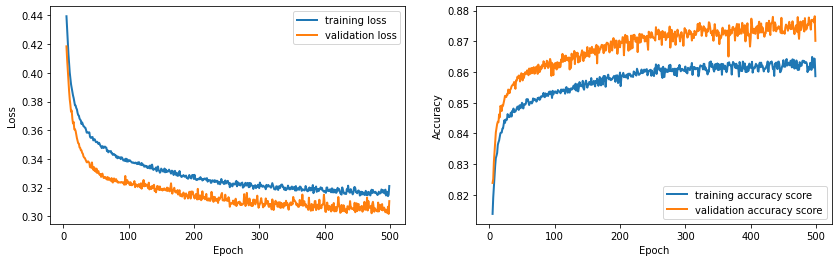

In [49]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training accuracy score')
plt.plot(logs.loc[5:,"val_accuracy"], lw=2, label='validation accuracy score')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

Now let us delete our old training and start anew. We do this by restoring the initial weights of our neural network:

In [51]:
model.set_weights(initial_weights)

In [52]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_val, y_val),
          verbose=1,
          # add in our early stopping callback
          callbacks=[early_stopping]
        )

Epoch 1/500
117/117 [==============================] - 1s 8ms/step - loss: 0.6754 - tp: 41429.0000 - fp: 24925.0000 - tn: 33458.0000 - fn: 17007.0000 - accuracy: 0.6411 - precision: 0.6244 - recall: 0.7090 - auc: 0.6875 - prc: 0.6578 - val_loss: 0.6340 - val_tp: 11555.0000 - val_fp: 3853.0000 - val_tn: 10776.0000 - val_fn: 3021.0000 - val_accuracy: 0.7646 - val_precision: 0.7499 - val_recall: 0.7927 - val_auc: 0.7662 - val_prc: 0.7141
Epoch 2/500
117/117 [==============================] - 1s 8ms/step - loss: 0.5812 - tp: 41744.0000 - fp: 14256.0000 - tn: 44127.0000 - fn: 16692.0000 - accuracy: 0.7351 - precision: 0.7454 - recall: 0.7144 - auc: 0.7729 - prc: 0.7361 - val_loss: 0.5197 - val_tp: 11711.0000 - val_fp: 3829.0000 - val_tn: 10800.0000 - val_fn: 2865.0000 - val_accuracy: 0.7708 - val_precision: 0.7536 - val_recall: 0.8034 - val_auc: 0.8307 - val_prc: 0.8204
Epoch 3/500
117/117 [==============================] - 1s 8ms/step - loss: 0.5304 - tp: 46130.0000 - fp: 15510.0000 - tn: 

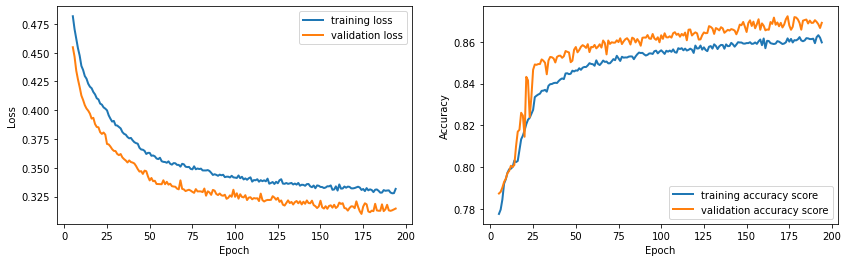

In [53]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training accuracy score')
plt.plot(logs.loc[5:,"val_accuracy"], lw=2, label='validation accuracy score')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

we have now finished training our neural network. Now let us use our model on the `test` data to predict the values, when it comes to neural networks the prediction stage is more commonly referred to  as *inference*: